In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Grid:
xmin, xmax = 0,1
N = 1000
dx = (xmax-xmin)/N
x= np.linspace(xmin,xmax,N)

In [3]:
#CFL condition:
CFL = 0.9
v = 1.0
dt = CFL * dx / v

In [4]:
#Old solution:
x0 = 0.5
sigma = 0.1
def f(x): 
    return np.exp(-(x - x0)**2 / sigma**2)

u_old = f(x)

In [5]:
#Initial Condition:
x0 = 0.5
sigma = 0.1
def f(x): 
    return np.exp(-(x - x0)**2 / sigma**2)

u = f(x)

In [6]:
#Analytic solution:
def analytic(x, t):
    arg1 = (x - v*t) % xmax
    arg2 = (x + v*t) % xmax
    return 0.5*(f(arg1) + f(arg2))

In [7]:
#Leapfrog:
nt = 300
alpha = v * dt / dx
u_new = np.zeros_like(u)
for n in range(nt):
    for j in range(1,N-1):
        u_new[j] =  (alpha**2) * u[j+1] + 2.0*u[j]*(1.0-alpha**2)+(alpha**2) * u[j-1]-u_old[j]
        
    u_new[0]=u_new[N-2]
    u_new[N-1]=u_new[1]
    u_old[:] = u[:]
    u[:] = u_new[:]
    

In [8]:
T = dt*nt
u_leapfrog = u
u_exact  = analytic(x, T)

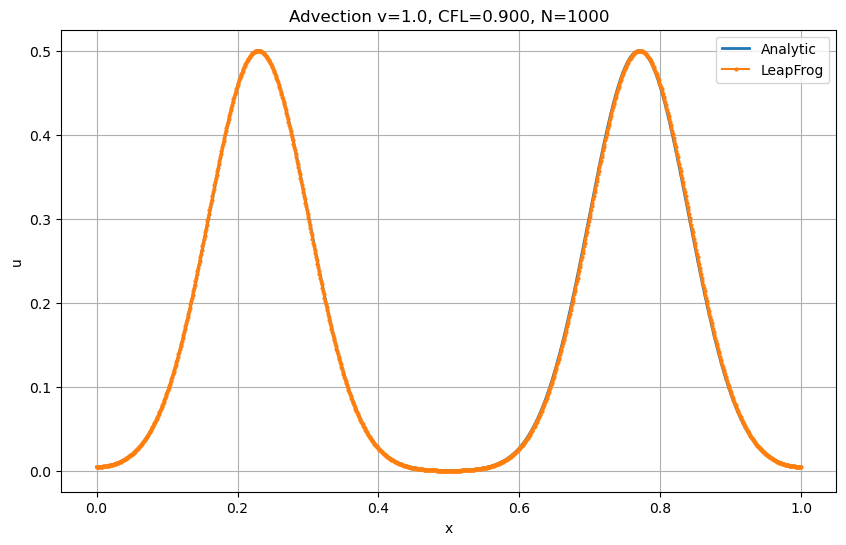

In [9]:
# ---------- plots ----------
plt.figure(figsize=(10,6))
plt.plot(x, u_exact, label='Analytic', linewidth=2)
plt.plot(x, u_leapfrog, '.-', label='LeapFrog', markersize=4)
plt.legend()
plt.title(f"Advection v={v}, CFL={CFL:.3f}, N={N}")
plt.xlabel("x")
plt.ylabel("u")
plt.grid(True)
plt.show()